<a href="https://colab.research.google.com/github/HoshimMardonov/Datasets/blob/main/graduate_admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import math

We load dataFrame using the pandas library


In [87]:
df = pd.read_csv("https://raw.githubusercontent.com/Rhtyme/ml_uz_book/main/practice_session/Multivariate_linear_regression_4_6/Admission_Predict.csv")

***Let's get acquainted with the database, that is, what columns there are, and what the data in them looks like, etc.***

In [88]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


The data set we use includes information about the probability of admission to the world's leading universities, based on the performance of applicants. Let's take a closer look at this dataset:

* **Serial no.** - sequence number of the row (no significance)
*   **Research** - Research experience or not (0 or 1)
*   **GRE Score **- the applicant's GRE (Graduate Record Examinations) score (max - 340)
*   **TOEFL Score** - the applicant's TOEFL English score (max - 120)
*   **University Rating**- rating of the university where the applicant wants to study (max - 5)
*   **SOP**- Evaluation of the applicant's statement of purpose (max - 5)
* **LOR**- strength of applicant recommendation (max - 5)
*   **CGPA**- average grade of the applicant in the previous institution of education (max - 10)
*   **Chance of Admit** - probability of admission to the university of the applicant's choice (range [0,1])

Now let's get acquainted with the technical aspects of the data set, that is, in what format, the number of rows, etc.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


As we can see, the dataset consists of 400 rows and each column is in different formats (int64 and float64). Let's fit this data set to mathematical operations, specifically the linear regression process. In this case, we first convert to a numpy array for ease of calculation, choosing float64 as the column format.

In [90]:
df = np.array(df, dtype = float)

In [91]:
df.shape

(400, 9)

We extract the columns from the data set for the learning process, and load them into the X variable as an array. In this case, we discard the unnecessary columns, in particular the Serial No column. Note that the last column, the Chance of Admit column, is not being loaded either, because we are loading this column into a separate variable as an array of targets.

In [92]:
X = df[:, 1:8]
X[:10]

array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.  ,   1.  ],
       [322.  , 110.  ,   3.  ,   3.5 ,   2.5 ,   8.67,   1.  ],
       [314.  , 103.  ,   2.  ,   2.  ,   3.  ,   8.21,   0.  ],
       [330.  , 115.  ,   5.  ,   4.5 ,   3.  ,   9.34,   1.  ],
       [321.  , 109.  ,   3.  ,   3.  ,   4.  ,   8.2 ,   1.  ],
       [308.  , 101.  ,   2.  ,   3.  ,   4.  ,   7.9 ,   0.  ],
       [302.  , 102.  ,   1.  ,   2.  ,   1.5 ,   8.  ,   0.  ],
       [323.  , 108.  ,   3.  ,   3.5 ,   3.  ,   8.6 ,   0.  ]])

In [93]:
X.shape[1]

7

We extract targets from the data set, and load them into the Y variable.

In [94]:
Y = df[:,8:]
Y[:10]

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45]])

As we saw above, the target array consists of numbers in the range [0,1]. Let's reduce them to [0,100] for convenience in the ledgers.

In [95]:
Y = Y * 100
Y[:10]

array([[92.],
       [76.],
       [72.],
       [80.],
       [65.],
       [90.],
       [75.],
       [68.],
       [50.],
       [45.]])

<h1>Refinement of input variables - standardization</h1>

> Let's use the standardization method for smoothing the input variables

To find the arithmetic mean and root mean square deviation in the above formula, we use the mean() and std() functions in the numpy library and create a feature_scaling function that expresses this formula.

In [96]:
def feature_scaling(X):
  avg_array = np.mean(X,0)
  std_array = np.std(X,0)
  return np.divide(X-avg_array, std_array)

In [97]:
X = feature_scaling(X)

In [98]:
X[:3]

array([[ 1.76210664,  1.74697064,  0.79882862,  1.09386422,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862,  0.59665321,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, -0.39776881,  0.05293342,
        -1.00563118,  0.90911166]])

For convenience in vertical calculations, let's add a vector whose value is to an array.

In [99]:
def add_bias(X):
  A_0 = np.ones((X.shape[0], 1))
  return np.hstack((A_0, X))

In [100]:
X = add_bias(X)

In [101]:
X[:5]

array([[ 1.        ,  1.76210664,  1.74697064,  0.79882862,  1.09386422,
         1.16732114,  1.76481828,  0.90911166],
       [ 1.        ,  0.62765641, -0.06763531,  0.79882862,  0.59665321,
         1.16732114,  0.45515126,  0.90911166],
       [ 1.        , -0.07046681, -0.56252785, -0.07660001, -0.39776881,
         0.05293342, -1.00563118,  0.90911166],
       [ 1.        ,  0.4531256 ,  0.42725722, -0.07660001,  0.0994422 ,
        -1.06145431,  0.11933921,  0.90911166],
       [ 1.        , -0.24499762, -0.72749202, -0.95202863, -1.39219083,
        -0.50426044, -0.65302852, -1.09997489]])

In [102]:
X.shape[1]

8

<h1>Split the data into training/test sets</h1>

Let's split the data set we have into training/test sets. In this case, the linear regression we create will learn from the training dataset and test its performance from the test dataset. We use an 80/20 ratio for the training/test dataset split, which means we split 80% of the dataset into the training dataset and 20% into the test dataset.

In [103]:
rows, _ = X.shape

In [104]:
rows

400

In [105]:
def split(X,Y):
  rows, _ = X.shape
  train_rows = round(rows * 0.8)
  test_rows = rows - train_rows
  return X[0:train_rows, :], X[train_rows:, :], Y[0:train_rows, :], Y[train_rows:, :]

In [106]:
X_train, X_test, Y_train, Y_test = split(X,Y)

In [107]:
print(f"X_train shape:{X_train.shape},\n"
      f"X_test shape:{X_test.shape}, \n"
      f"Y_train shape:{Y_train.shape}, \n"
      f"Y_test:{Y_test.shape}")

X_train shape:(320, 8),
X_test shape:(80, 8), 
Y_train shape:(320, 1), 
Y_test:(80, 1)


**Initialization of coefficients**
> We have n=7 because the data set has 7 columns (column 8 is a vector of 1's). So we have 8 coefficients, including the bias, and we can represent them in vectorized form in a 1-dimensional array. When initializing the coefficients, we use the rand function of the numpy library, which generates random numbers.

In [108]:
A = np.random.rand(X.shape[1], 1)

In [109]:
A

array([[0.63426106],
       [0.61443209],
       [0.54331764],
       [0.82283791],
       [0.768538  ],
       [0.36996184],
       [0.09115052],
       [0.25281265]])

**Linear regression function**
> Now that we've defined the variables for the coefficients, let's define the basic function of the linear regression. Let's call this function f_x().

In [110]:
def f_x(X,A):
  return np.dot(X,A)

**Value function and Gradient descent**
> Recall the value function of linear regression:
 <br>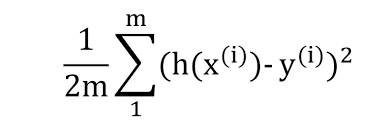

**Let's express this value function in a program:**

In [111]:
def cost(X, A, Y, m):
  diff = f_x(X,A) - Y
  diff_2 = np.power(diff, 2)
  sum_ = np.sum(diff_2)
  cost_ = sum_ / (2 * m)
  return cost_

And in gradient descent, we find the parameters that minimize the value function above. 

> Let's define a number of hyperparameters in the loop implementation above.

> We define the value of the number of steps as and store it in the epochs variable.

> Let's define the learning rate as and store it in the learning_rate variable.

In [112]:
epochs = 100
learning_rate = 0.05

We create a *gradient_descent* function that performs gradient descent and
we call it

In [113]:
def gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs):
  
  m_train = Y_train.shape[0]
  m_test = Y_test.shape[0]
  train_costs = []
  test_costs = []
  for k in range(epochs):
    fx = f_x(X_train, A)
    sum_diff = np.dot(X_train.T, np.subtract(fx, Y_train)) / m_train
    A = A - learning_rate * sum_diff
    cost_train = cost(X_train, A, Y_train, m_train)
    cost_test = cost(X_test, A, Y_test, m_test)
    if k % 10 == 0:
          print('epoch: %d, %f'% (k, cost_train))
          print('epoch: %d, %f'% (k, cost_test))
    train_costs.append(cost_train)
    test_costs.append(cost_test)
  return A, train_costs, test_costs

In [114]:
A, train_costs, test_costs = gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs)

epoch: 0, 2369.024585
epoch: 0, 2364.707508
epoch: 10, 841.397807
epoch: 10, 993.507719
epoch: 20, 318.660900
epoch: 20, 406.326259
epoch: 30, 129.719512
epoch: 30, 177.641282
epoch: 40, 61.014503
epoch: 40, 87.894560
epoch: 50, 35.823827
epoch: 50, 51.421243
epoch: 60, 26.458109
epoch: 60, 35.850955
epoch: 70, 22.888952
epoch: 70, 28.788912
epoch: 80, 21.467308
epoch: 80, 25.363351
epoch: 90, 20.856625
epoch: 90, 23.587213


To visually see how much the cost function changes on the gradient descent, let's create a graph function plot_cost, which draws a graph using the matplotlib library.

In [115]:
def plot_cost(train_costs, test_costs, epochs):
  plt.xlabel("Epochs")
  plt.ylabel("Costs")
  plt.plot(epochs, train_costs, 'm', linewidth="1", color='r', label='error in exercise')
  plt.plot(epochs, test_costs, 'm', linewidth="1", color='g', label='error in test')
  plt.legend(loc="upper right")
  plt.show()

The *plot_cost* function accepts 3 array variables as parameters and these are:
> an array representing the result of the value function for the training set, the train_costs variable 

> an array representing the result of the value function for the test set, the test_costs variable

>array representing epochs, variable epochs

In [116]:
n_epochs = np.arange(1, epochs + 1)
n_train_costs = np.array(train_costs)
n_test_costs = np.array(test_costs)

**Calculate loss**

In [117]:
def calculate_loss(X,A,Y):
  m = Y.shape[0]
  fx = f_x(X, A)
  diff = fx - Y
  kv = np.power(diff, 2)
  sum_kv = np.sum(kv)
  kv_m = sum_kv / m
  for i in range(m):
    print('i:%d, fx:%f, Y: %f, diff: %f, kv: %f'%(i, fx[i], Y[i], diff[i], kv[i]))
  rmse = math.sqrt(kv_m)
  print('sum: %f, kv_m: %f, rmse: %f'%(sum_kv, kv_m, rmse))
  return rmse

In [118]:
print('root mean squared errrors: ', calculate_loss(X_test, A, Y_test))

i:0, fx:71.047334, Y: 75.000000, diff: -3.952666, kv: 15.623566
i:1, fx:71.986379, Y: 73.000000, diff: -1.013621, kv: 1.027428
i:2, fx:67.149527, Y: 72.000000, diff: -4.850473, kv: 23.527090
i:3, fx:58.335054, Y: 62.000000, diff: -3.664946, kv: 13.431827
i:4, fx:63.807604, Y: 67.000000, diff: -3.192396, kv: 10.191391
i:5, fx:83.986384, Y: 81.000000, diff: 2.986384, kv: 8.918487
i:6, fx:54.739748, Y: 63.000000, diff: -8.260252, kv: 68.231768
i:7, fx:52.196340, Y: 69.000000, diff: -16.803660, kv: 282.362987
i:8, fx:78.582571, Y: 80.000000, diff: -1.417429, kv: 2.009106
i:9, fx:49.138355, Y: 43.000000, diff: 6.138355, kv: 37.679396
i:10, fx:76.193240, Y: 80.000000, diff: -3.806760, kv: 14.491423
i:11, fx:61.068318, Y: 73.000000, diff: -11.931682, kv: 142.365036
i:12, fx:64.253971, Y: 75.000000, diff: -10.746029, kv: 115.477145
i:13, fx:72.419955, Y: 71.000000, diff: 1.419955, kv: 2.016273
i:14, fx:74.356543, Y: 73.000000, diff: 1.356543, kv: 1.840208
i:15, fx:83.663165, Y: 83.000000, diff

We can also get acquainted with the values ​​of the optimal coefficients found by gradient descent:

In [119]:
A

array([[71.56428001],
       [ 2.14643691],
       [ 2.91693739],
       [ 1.2509758 ],
       [ 0.29815833],
       [ 2.28958284],
       [ 4.94497825],
       [ 0.8179122 ]])

Let's graphically represent the change of the cost function at each step using the plot_cost function.

<ipython-input-115-f1fb3824de42>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_costs, 'm', linewidth="1", color='r', label='error in exercise')
<ipython-input-115-f1fb3824de42>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(epochs, test_costs, 'm', linewidth="1", color='g', label='error in test')


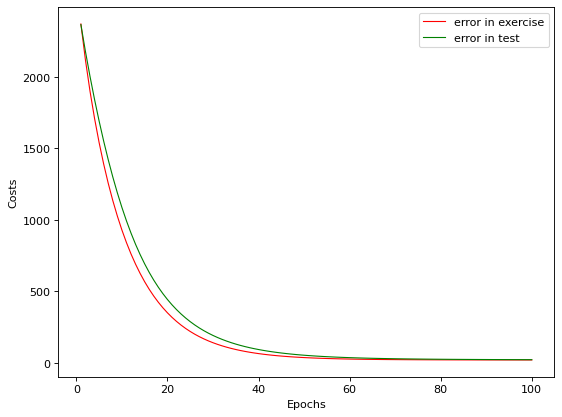

In [120]:
figure(figsize=(8,6), dpi=80)

plot_cost(train_costs, test_costs, n_epochs)

From the graph above, we can see that the error is decreasing at each step in both the training set and the test set. From this we can conclude that the linear regression we created is working correctly.

Now in practice, let's predict the first 10 rows in the test set using the coefficients found by linear regression and check with real targets:

In [121]:
m_to_predict = 10

predicted = f_x(X_test[:m_to_predict, :], A)

for i in range(m_to_predict):
  print('bashorat: %f, haqiqiy: %f'% (predicted[i], Y_test[i]))

bashorat: 71.047334, haqiqiy: 75.000000
bashorat: 71.986379, haqiqiy: 73.000000
bashorat: 67.149527, haqiqiy: 72.000000
bashorat: 58.335054, haqiqiy: 62.000000
bashorat: 63.807604, haqiqiy: 67.000000
bashorat: 83.986384, haqiqiy: 81.000000
bashorat: 54.739748, haqiqiy: 63.000000
bashorat: 52.196340, haqiqiy: 69.000000
bashorat: 78.582571, haqiqiy: 80.000000
bashorat: 49.138355, haqiqiy: 43.000000


We can see that the predicted targets are close to the values of the actual targets, although with some error.